### Script - Microdados da Educação Superior 2020

Importando as bibliotecas a serem utilizadas neste projeto. Primeiramente, importaremos as bibliotecas **pandas**, **matplotlib** e **os**. Em seguida, faremos a leitura do dataset.

**Introdução ao Pandas:** Pandas é uma biblioteca para Ciência de Dados de código aberto (open source), construída sobre a linguagem Python, e que providencia uma abordagem rápida e flexível, com estruturas robustas para se trabalhar com dados relacionais (ou rotulados), e tudo isso de maneira simples e intuitiva.

**Introdução ao Matplotlib:** Matplotlib é uma biblioteca compreensiva para criação de visualizações estáticas, animadas, e interativas em Python. Para mais informações sobre essa tecnologia, acesse a documentação MatPlotlib.

**Introdução ao OS:** Biblioteca de comandos do sistema operacional que irá auxiliar a fazer algumas operações dentro do computador.

In [124]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [125]:
ies_df = pd.read_csv((os.getcwd() + "/arquivosExcel/CADASTRO_IES_2020.CSV"),
                     encoding='ISO-8859-1', sep=';', low_memory=False)
# os.getcwd() para pegar o caminho do diretório atual
# encoding='ISO-8859-1' para não dar erro de encoding
# sep=';' para separar por ponto e vírgula
# low_memory=False para não dar erro de memória - não é recomendado para arquivos muito grandes

ies_df.head() # Exibindo as 5 primeiras linhas do dataframe para verificar se ocorreu tudo bem com a importação/leitura

# ies_df.columns.to_list() # Exibindo as colunas do dataframe

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,...,DOC_EX_60_MAIS,DOC_EX_BRANCA,DOC_EX_PRETA,DOC_EX_PARDA,DOC_EX_AMARELA,DOC_EX_INDÍGENA,DOC_EX_COR_ND,DOC_EX_BRA,DOC_EX_EST,DOC_EX_COM_DEFICIÊNCIA
0,2020,Norte,1,Rondônia,RO,11,Ariquemes,1100023,0,Leste Rondoniense,...,2,18,1,8,0,0,27,54,0,0
1,2020,Norte,1,Rondônia,RO,11,Ariquemes,1100023,0,Leste Rondoniense,...,3,45,5,17,2,0,0,67,2,0
2,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,9,114,2,31,2,0,3,152,0,0
3,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,1,30,1,4,0,0,4,39,0,0
4,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,0,14,0,7,0,0,18,39,0,0


Começando a fazer os gráficos, agrupando os dados de acordo com os funcionários inscritos por região, docentes de diferentes etnias, gêneros e portadores de deficiências.

Análise da Quantidade de Docentes por Região

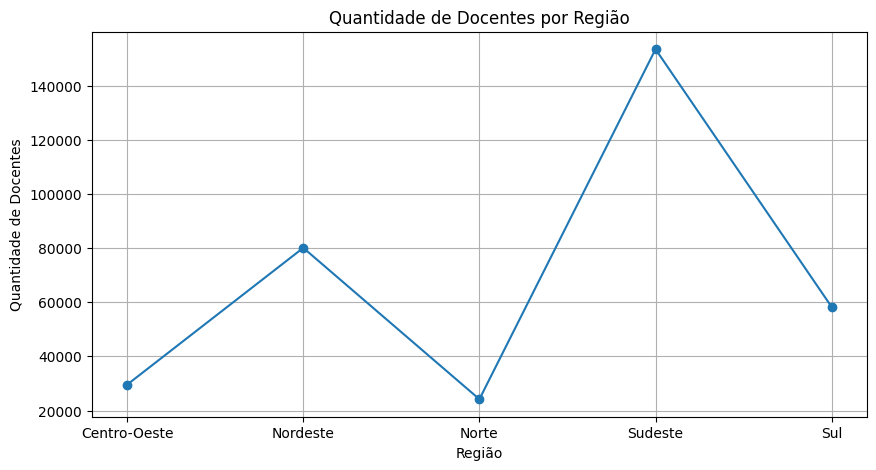

In [126]:

dataDocTotal = ies_df.groupby('NO_REGIAO_IES')['QT_TEC_TOTAL'].sum()

plt.plot(dataDocTotal.index, dataDocTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes por Região') # Título do gráfico

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

caminhoGrafico = os.path.join(os.getcwd() + '/arquivosGraficos', 'docentesPorRegiao.png') # Caminho para a pasta onde será salvo o gráfico
plt.savefig(caminhoGrafico) # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes Pretos por Região

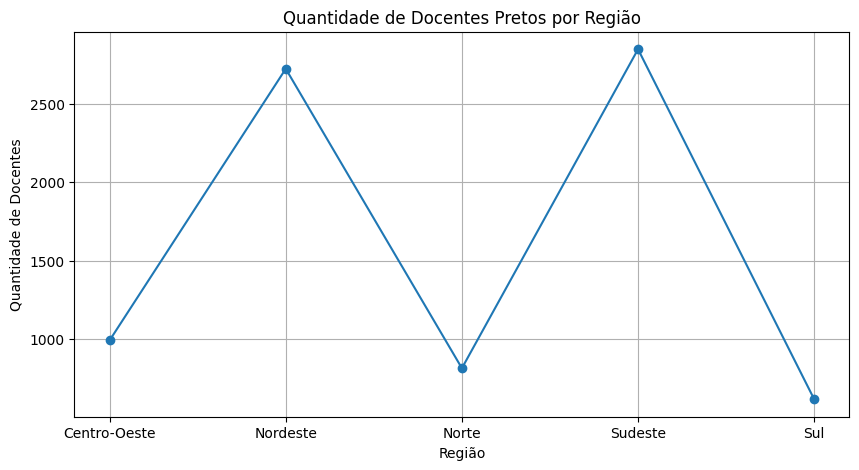

In [127]:
dataDocPretosTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_PRETA'].sum()

plt.plot(dataDocPretosTotal.index, dataDocPretosTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes Pretos por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.savefig('docentesPretosPorRegiao.png') # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes Brancos por Região

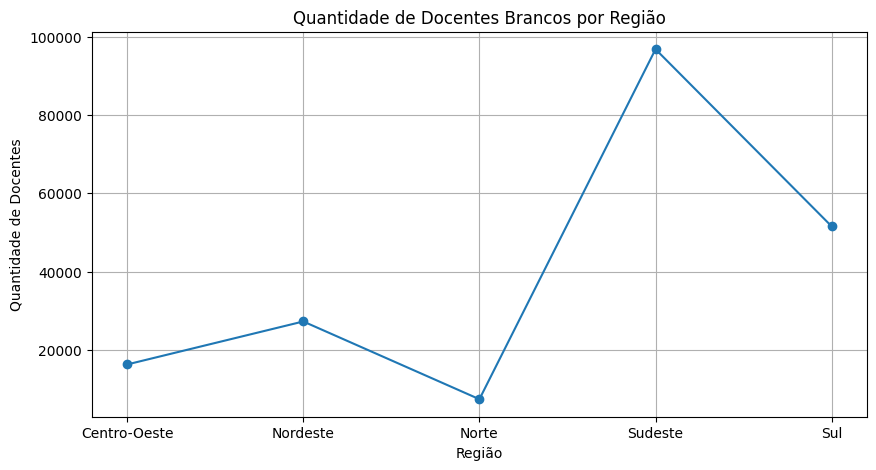

In [128]:
dataDocBrancosTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_BRANCA'].sum()

plt.plot(dataDocBrancosTotal.index, dataDocBrancosTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes Brancos por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.savefig('docentesBrancosPorRegiao.png') # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes Amarelos por Região

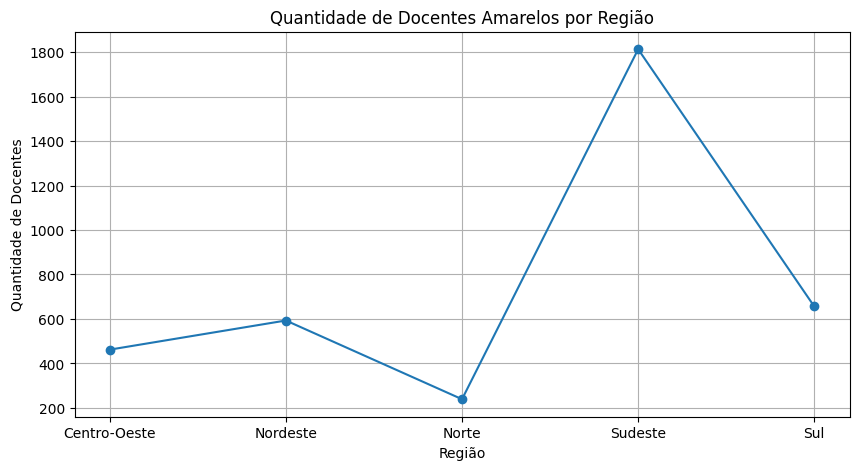

In [129]:
dataDocAmarelosTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_AMARELA'].sum()

plt.plot(dataDocAmarelosTotal.index, dataDocAmarelosTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes Amarelos por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.savefig('docentesAmarelosPorRegiao.png') # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes Indígenas por Região

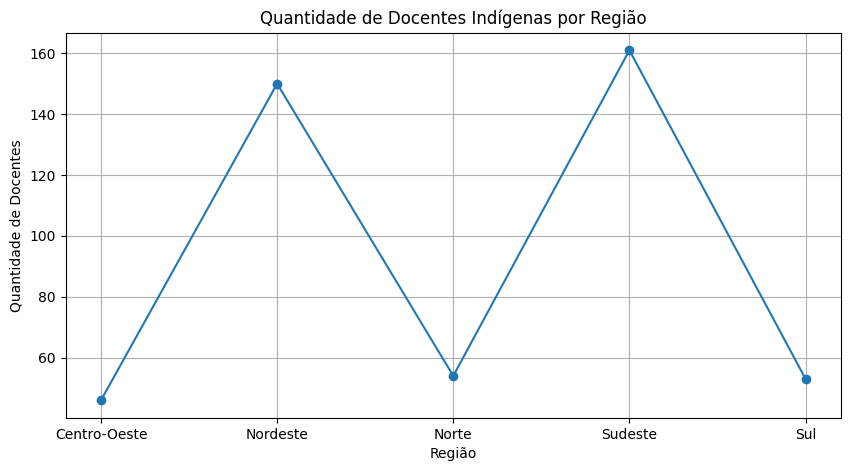

In [130]:
dataDocIndigenasTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_INDÍGENA'].sum()

plt.plot(dataDocIndigenasTotal.index, dataDocIndigenasTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes Indígenas por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.savefig('docentesIndigenasPorRegiao.png') # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes com Deficiência (PCD) por Região

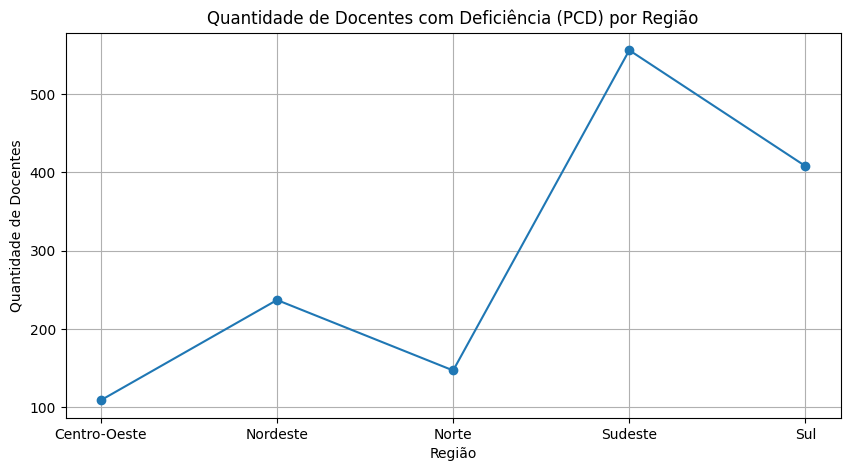

In [131]:
dataDocDeficientesTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_COM_DEFICIÊNCIA'].sum()

plt.plot(dataDocDeficientesTotal.index, dataDocDeficientesTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes com Deficiência (PCD) por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.savefig('docentesDeficientesPorRegiao.png') # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico